In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
X, y = make_moons(100, noise=0.25,random_state=2)
X

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

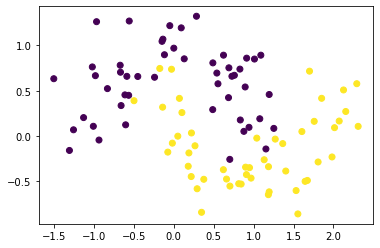

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [19]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [20]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

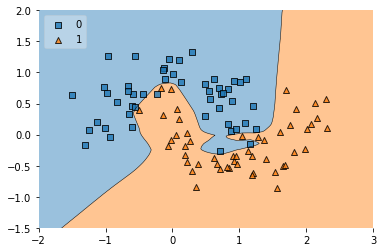

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

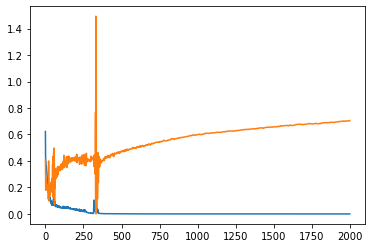

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [27]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [28]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

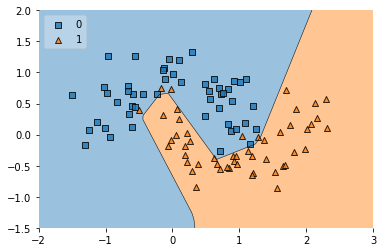

In [29]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

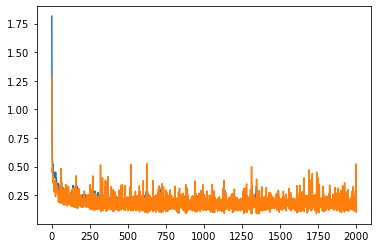

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [31]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

/home/dell/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

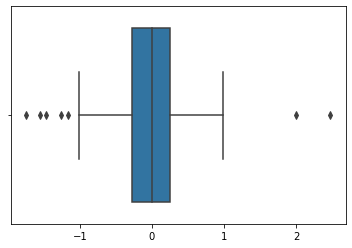

In [32]:
sns.boxplot(model1_weight_layer1)

/home/dell/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

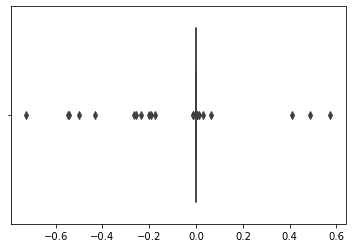

In [33]:
sns.boxplot(model2_weight_layer1)

In [34]:
model1_weight_layer1.min()

-1.7475445

In [35]:
model2_weight_layer1.min()

-0.72728354

/home/dell/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dell/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

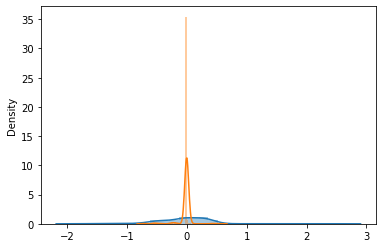

In [36]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [37]:
model1.get_weights()[0].reshape(256)

array([ 3.28536630e-01,  3.53810161e-01, -1.41439795e-01,  1.90483212e-01,
        2.22727016e-01,  4.30788472e-02, -5.27676940e-01, -4.64509308e-01,
       -6.31950140e-01,  1.89434439e-01,  3.04520696e-01,  1.70361578e-01,
        4.87170462e-03, -5.84989250e-01,  1.04064643e-01, -5.22912025e-01,
       -6.11611307e-01,  2.98790127e-01, -1.30892634e-01,  4.06190157e-02,
        3.88326824e-01, -4.82219100e-01,  8.77298713e-02,  1.17486133e-03,
        1.10392489e-01,  2.25120872e-01,  4.32176515e-02,  8.70598182e-02,
       -2.58813649e-01, -1.05389729e-01, -4.29361790e-01, -4.94668961e-01,
       -3.04366738e-01,  2.73116052e-01, -4.72188711e-01, -5.85412502e-01,
        2.86947608e-01, -2.73476452e-01, -4.24191058e-01,  3.59118104e-01,
        4.36475188e-01,  3.40240151e-01, -2.92628139e-01, -5.66152453e-01,
        3.15199435e-01, -1.73147157e-01, -1.18235305e-01, -2.85531998e-01,
        4.19969440e-01, -3.33313435e-01,  3.15913141e-01, -4.53369617e-01,
       -1.24602251e-01,  